In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [27]:
# Define the frequency and sampling frequency
fs = 1/0.05
fg = 1000

# Compute the number of samples
Np = 10
N = int(np.ceil(Np*fg/fs))
if N%2 != 0:
    N += 1

# Generate the sin function
k = np.arange(0,N-1)
s = np.sin(2*np.pi*fs*k/fg)

# Change the frequency
fs = 1/0.05 + 0.01
s = np.sin(2*np.pi*fs*k/fg)

# Compute the DFT
dft = np.fft.fft(s)/(N-1)

# Display the amplitude
amplitude = np.abs(dft)

# Scale the x-axis in frequencies
frequencies = np.fft.fftfreq(N-1, 1/fg)

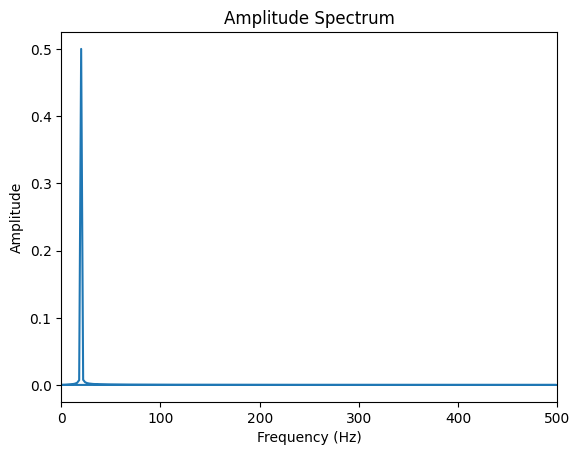

Total Harmonic Distortion: 0.000


In [28]:
# Plot the amplitude spectrum
plt.plot(frequencies, amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')
plt.xlim(0, fg/2)
plt.show()

# Compute the Total Harmonic Distortion
A1 = amplitude[0]
A2 = np.sqrt(np.sum(amplitude[1:]**2))
THD = A1/A2

print("Total Harmonic Distortion: {:.3f}".format(THD))

In [26]:
# Generate sin signal with period Np and frequency fs
fg = 1000
fs = 100
T = 1/fs
Np = 5
N = 2*Np*fg
k = np.arange(N)
s = np.sin(2*np.pi*fs*k*T)

<StemContainer object of 3 artists>

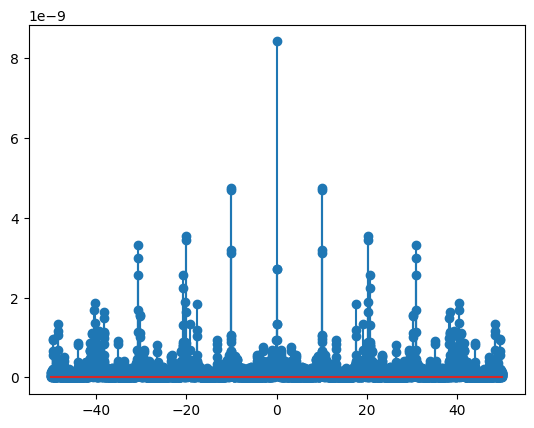

In [19]:
# Compute the DFT and display amplitude
S = np.fft.fft(s)
freq = np.fft.fftfreq(N, T)
plt.stem(freq, np.abs(S))

<StemContainer object of 3 artists>

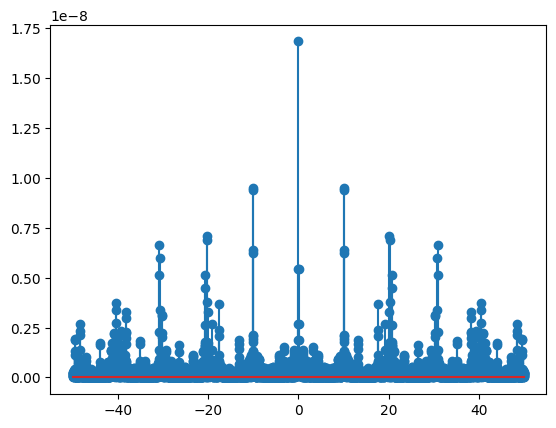

In [20]:
# Change signal frequency and compute DFT
fs2 = 200
s2 = np.sin(2*np.pi*fs2*k*T)
S2 = np.fft.fft(s2)
plt.figure()
plt.stem(freq, np.abs(S2))

<StemContainer object of 3 artists>

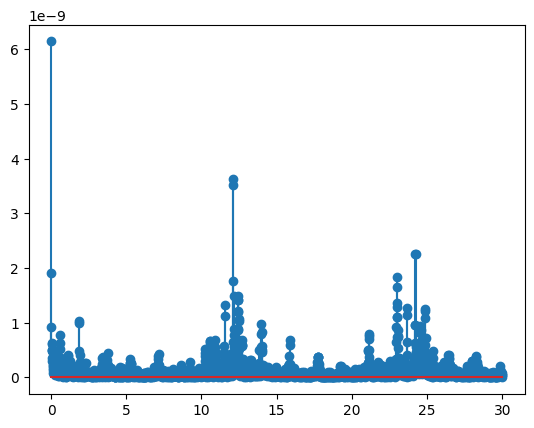

In [4]:
# Adjust N for best THD
Np = 3
N = 2*Np*fg
k = np.arange(N)
s3 = np.sin(2*np.pi*fs2*k*T)
S3 = np.fft.fft(s3)
A1 = np.abs(S3[1])
A2 = np.abs(S3[2])
A3 = np.abs(S3[3])
THD = np.sqrt(A2**2 + A3**2)/A1
plt.figure()
plt.stem(freq[0:N//2], np.abs(S3[0:N//2]))

<StemContainer object of 3 artists>

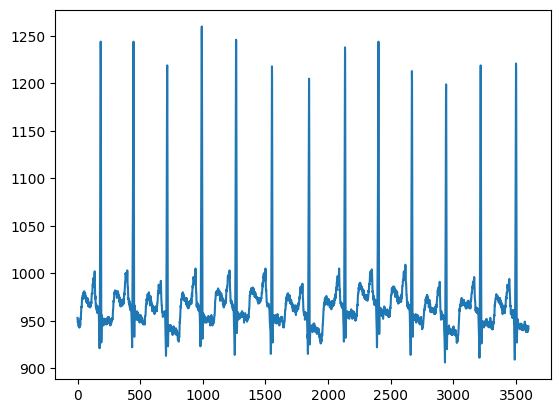

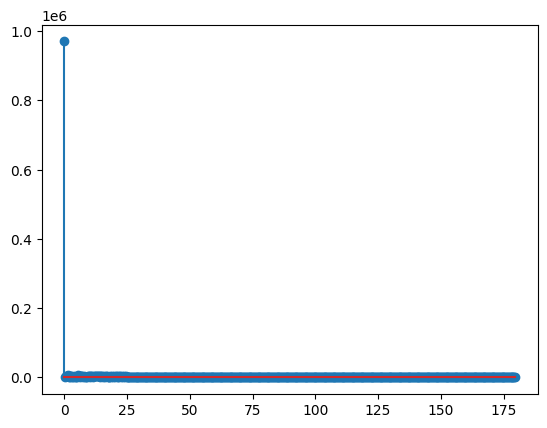

In [5]:
# Load file and analyze DFT
import scipy.io
data = scipy.io.loadmat('C:/Users/ksevi/OneDrive/Desktop/MASTER/SCENE_LALIGANT/tercer report/100m.mat')
#val= data['val'] 
#value = mdata[0][:20]
val = data['val'][0]
plt.figure()
plt.plot(val)
N = 1000
k = np.arange(N)
s4 = val[0:N]
S4 = np.fft.fft(s4)
freq = np.fft.fftfreq(N, 1/360)
plt.figure()
plt.stem(freq[0:N//2], np.abs(S4[0:N//2]))

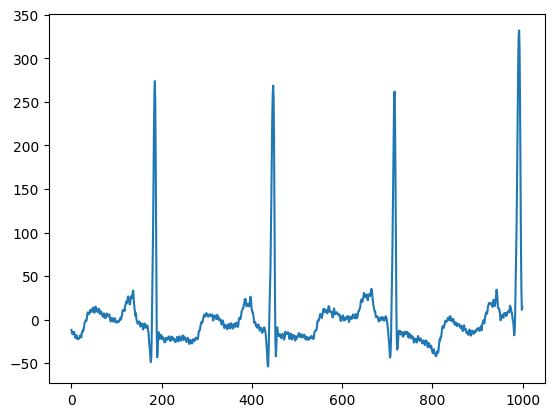

In [6]:
# Cancel 60Hz frequency
#b, a = butter(4, 2*np.pi*60, 'high', fs=360)
b, a = butter(4, 2*np.pi*40/360, 'high', fs=360)

s5 = filtfilt(b, a, s4)
S5 = np.fft.fft(s5)
plt.figure()
plt.plot(s5)

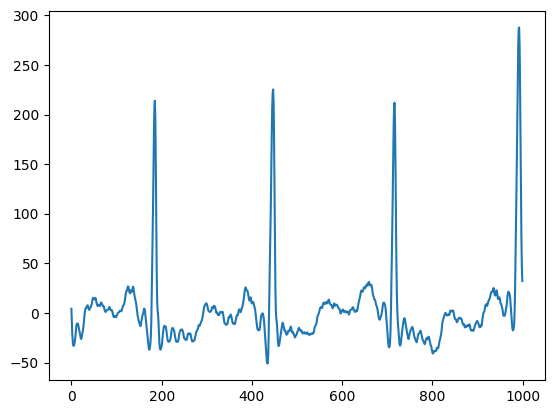

In [7]:
# Denoise signal with Butterworth filter
cutoff = 20
b, a = butter(4, 2*np.pi*cutoff, 'low', fs=360)
S6 = S5.copy()
S6[(freq > cutoff)] = 0
s6 = np.fft.ifft(S6)
s6 = np.real(s6)
s6 = filtfilt(b, a, s6)
plt.figure()
plt.plot(s6)